# Prithvi Shetty

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.linear_model import LinearRegression

## 1. Active data exploration

In [3]:
#1
from sklearn.datasets import load_boston

In [332]:
boston=load_boston()
bx=boston.data
by=boston.target

In [609]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [65]:
b=pd.DataFrame(boston.data, columns=boston.feature_names)
b['target'] = pd.Series(boston.target)

In [89]:
#2
#Engineered features
b['x1']=np.sqrt(b.CRIM)
b['x2']=(b.ZN)*(b.INDUS)
b['x3']=(b.CRIM)*(b.DIS)*(b.PTRATIO)
b['x4']=(b.CHAS)+(b.NOX)
b['x5']=(b.RM)*(b.LSTAT)
b['x6']=(b.RAD)*10
b['x7']=(b.TAX)/10
b['x8']=np.square(b.DIS)
b['x9']=np.sqrt(b.B)
b['x10']=(b.AGE)*(b.LSTAT)

In [103]:
b.head()
b.shape

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,1.124070,-6.207131,40.799656,120.140845,1.100807,1.937127,0.048551,-0.012849,0.273339,-0.664381
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,1.780402,-2.276355,52.671156,85.839891,0.831865,0.001943,0.070298,0.007395,0.578491,-1.442398
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,-0.065907,-1.061981,-3.119581,-39.807519,1.442879,0.523383,-0.043607,-0.009180,-0.072787,1.788497
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,1.366755,11.879941,50.496650,-200.765285,0.621899,0.112286,-0.047458,-0.002598,-2.311961,0.728991
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,1.681828,15.702178,60.424740,-165.190347,0.231258,0.810147,-0.241735,-0.010792,-0.196437,0.256537


(506, 34)

In [91]:
#3
#Bogus features
b['b1']=np.random.randn(506)
b['b2']=np.random.randn(506)*10
b['b3']=np.random.randn(506)*100
b['b4']=np.random.randn(506)*100
b['b5']=np.sqrt(np.abs(np.random.randn(506)))
b['b6']=np.square(np.random.randn(506))
b['b7']=np.random.randn(506)/10
b['b8']=np.random.randn(506)/100
b['b9']=np.random.randn(506)**3
b['b10']=np.random.randn(506)+np.random.randn(506)

In [347]:
b.tail()
b.shape

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,...,-0.090736,-8.695239,44.198455,2.516446,0.413808,4.857381,0.120867,0.007665,0.626322,0.774951
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,...,0.899643,0.120522,131.253752,37.486273,0.962718,1.194707,-0.035609,0.017065,1.343579,-1.943105
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,...,0.360292,-14.477895,-120.432951,52.851757,1.247140,0.233571,-0.060697,-0.011123,0.491361,1.005092
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,...,0.656746,-2.115308,-15.181417,79.544965,0.248972,0.361612,0.057475,0.002299,-1.245142,-1.773529
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,...,-0.182617,-18.385421,62.421623,154.527197,0.893015,0.162497,0.296709,-0.002435,4.334856,-2.263320


(506, 34)

In [348]:
features=b.drop('target',axis=1)
features.shape

(506, 33)

In [210]:
#4
mean=b.describe().transpose()
mean['Corr']=b.corr().transpose().target
mean['Null count']=b.isnull().sum()

In [211]:
mean

,count,mean,std,min,25%,50%,75%,max,Corr,Null count
CRIM,506.0,3.593761,8.596783,0.006320,0.082045,0.256510,3.647423,88.976200,-0.385832,0
ZN,506.0,11.363636,23.322453,0.000000,0.000000,0.000000,12.500000,100.000000,0.360445,0
INDUS,506.0,11.136779,6.860353,0.460000,5.190000,9.690000,18.100000,27.740000,-0.483725,0
CHAS,506.0,0.069170,0.253994,0.000000,0.000000,0.000000,0.000000,1.000000,0.175260,0
NOX,506.0,0.554695,0.115878,0.385000,0.449000,0.538000,0.624000,0.871000,-0.427321,0
RM,506.0,6.284634,0.702617,3.561000,5.885500,6.208500,6.623500,8.780000,0.695360,0
AGE,506.0,68.574901,28.148861,2.900000,45.025000,77.500000,94.075000,100.000000,-0.376955,0
DIS,506.0,3.795043,2.105710,1.129600,2.100175,3.207450,5.188425,12.126500,0.249929,0
RAD,506.0,9.549407,8.707259,1.000000,4.000000,5.000000,24.000000,24.000000,-0.381626,0
TAX,506.0,408.237154,168.537116,187.000000,279.000000,330.000000,666.000000,711.000000,-0.468536,0


This is Graph for column number: 0


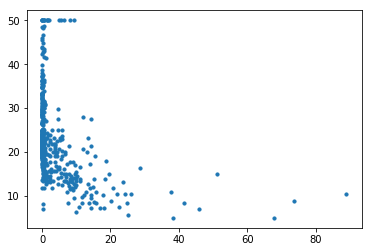

This is Graph for column number: 1


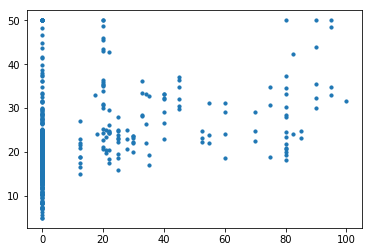

This is Graph for column number: 2


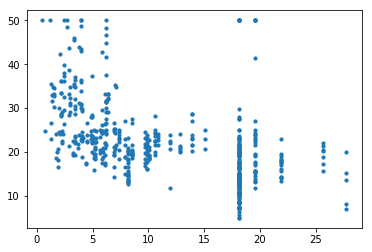

This is Graph for column number: 3


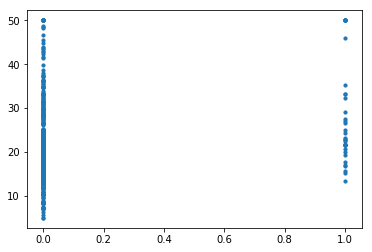

This is Graph for column number: 4


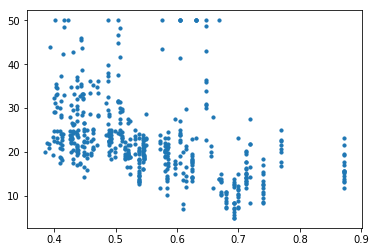

This is Graph for column number: 5


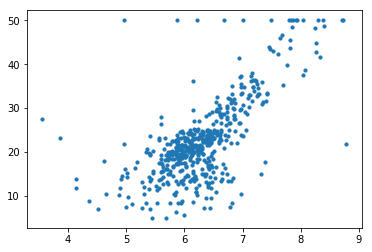

This is Graph for column number: 6


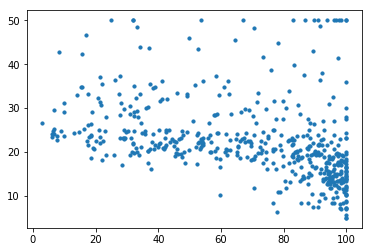

This is Graph for column number: 7


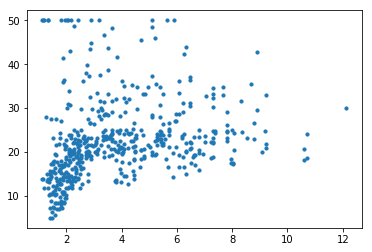

This is Graph for column number: 8


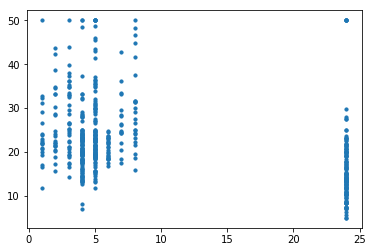

This is Graph for column number: 9


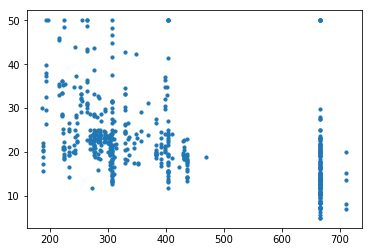

This is Graph for column number: 10


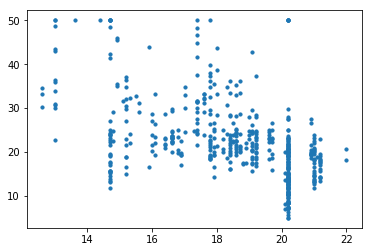

This is Graph for column number: 11


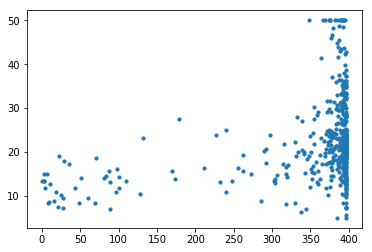

This is Graph for column number: 12


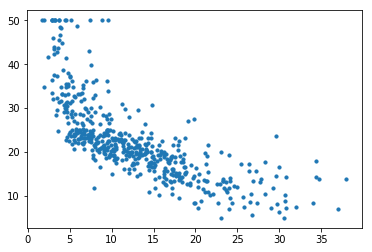

In [132]:
#5
for i in range(0,13):
    plt.scatter(b.iloc[:,i],b.target,cmap='cmap_bold',s=10)
    print('This is Graph for column number:',i )
    plt.show()

This is Graph for column number: 14


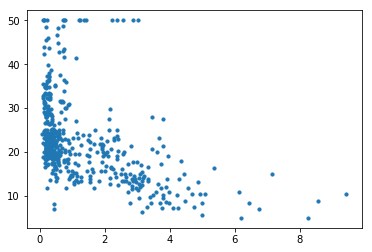

This is Graph for column number: 15


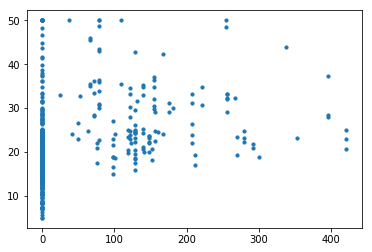

This is Graph for column number: 16


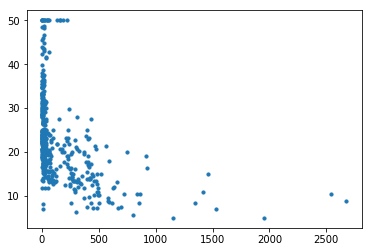

This is Graph for column number: 17


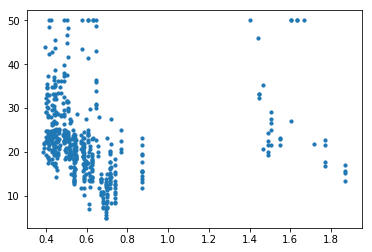

This is Graph for column number: 18


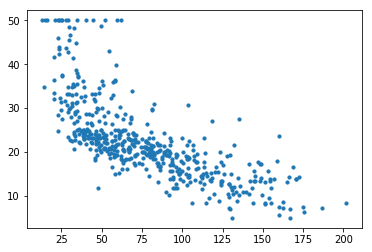

This is Graph for column number: 19


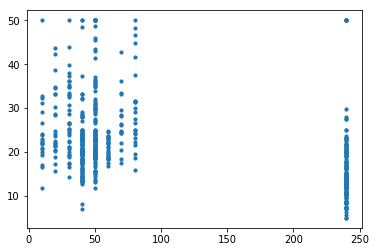

This is Graph for column number: 20


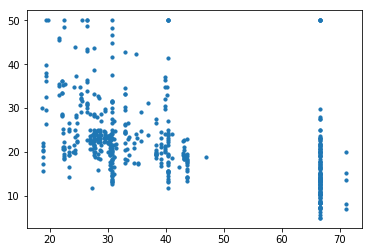

This is Graph for column number: 21


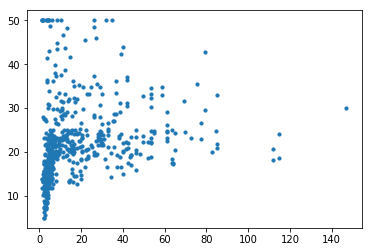

This is Graph for column number: 22


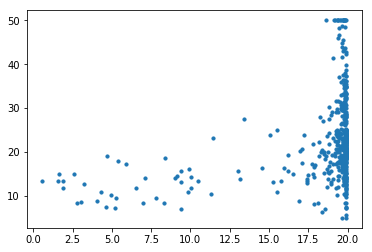

This is Graph for column number: 23


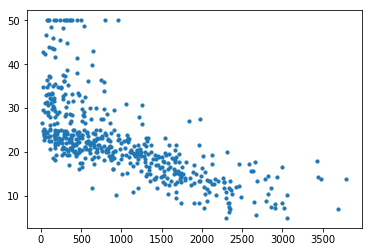

This is Graph for column number: 24


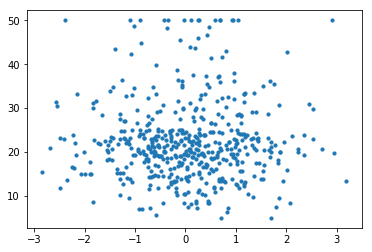

This is Graph for column number: 25


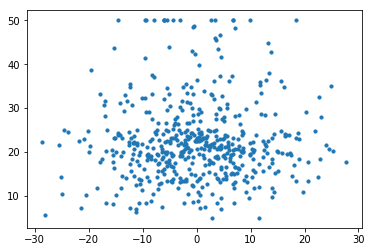

This is Graph for column number: 26


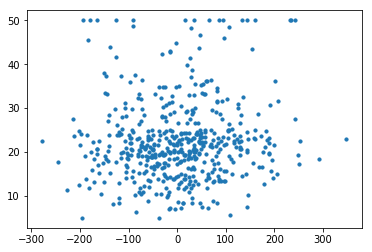

This is Graph for column number: 27


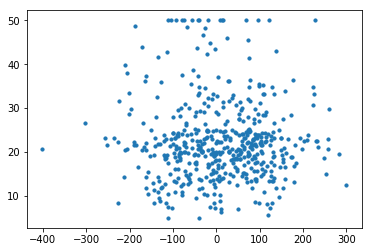

This is Graph for column number: 28


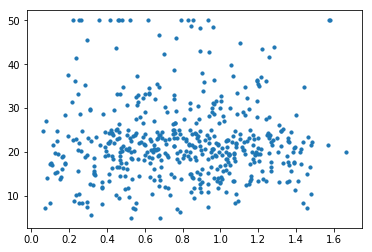

This is Graph for column number: 29


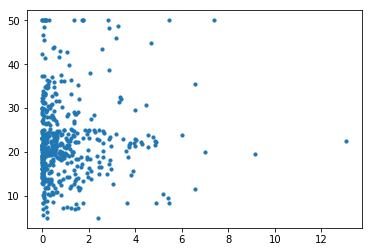

This is Graph for column number: 30


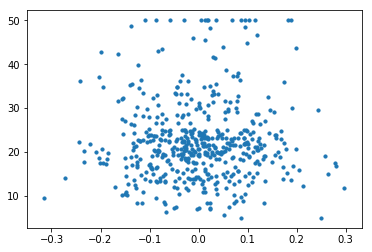

This is Graph for column number: 31


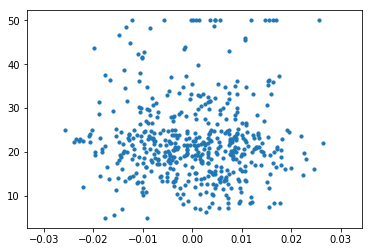

This is Graph for column number: 32


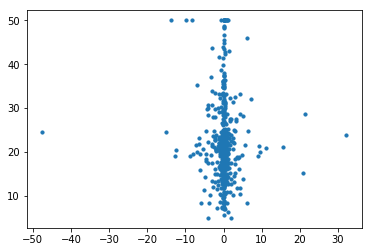

This is Graph for column number: 33


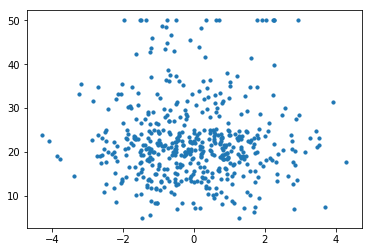

In [133]:
for i in range(14,34):
    plt.scatter(b.iloc[:,i],b.target,cmap='cmap_bold',s=10)
    print('This is Graph for column number:',i )
    plt.show()

#### Correlation scatter plots for columns INDUS, RM ,LSTAT and x5 seem very relevant. 
#### The scatter plots for columns all the bogus columns,x4 and CHAS seems very irrelevant

## 2. A few simple models

In [610]:
from sklearn.model_selection import cross_val_score

In [611]:
-cross_val_score(lin,features,b.target,cv=100,scoring='neg_mean_squared_error').mean()

19.632755922174496

In [420]:
lin=LinearRegression()

In [421]:
#2.1  Mean quadratic loss function
def mloss(y,x):
    lin.fit(x,y)
    return(np.square(y - lin.predict(x)).mean())

In [422]:
mloss(b.target,features)

15.024966521944481

In [423]:
metrics.mean_squared_error(b.target,lin.predict(features))

15.024966521944474

In [415]:
#Mean quadratic loss for all features
for i in range(0,34):
    print('The mean quadratic loss for column no: ', i, ' is')
    mloss(b.target,b.iloc[:,i].reshape(-1,1))   

The mean quadratic loss for column no:  0  is


C:\Users\Prathik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


71.85234666526343

The mean quadratic loss for column no:  1  is


73.4516960947557

The mean quadratic loss for column no:  2  is


64.66622164107531

The mean quadratic loss for column no:  3  is


81.8265141193155

The mean quadratic loss for column no:  4  is


69.00428835540674

The mean quadratic loss for column no:  5  is


43.60055177116957

The mean quadratic loss for column no:  6  is


72.42398092899347

The mean quadratic loss for column no:  7  is


79.14634158607113

The mean quadratic loss for column no:  8  is


72.12481188075273

The mean quadratic loss for column no:  9  is


65.88727533683911

The mean quadratic loss for column no:  10  is


62.65220001376923

The mean quadratic loss for column no:  11  is


75.03242920751906

The mean quadratic loss for column no:  12  is


38.48296722989416

The mean quadratic loss for column no:  13  is


1.1965429738283134e-29

The mean quadratic loss for column no:  14  is


66.53132819746094

The mean quadratic loss for column no:  15  is


77.350820365194

The mean quadratic loss for column no:  16  is


69.95008246123223

The mean quadratic loss for column no:  17  is


84.39420372893417

The mean quadratic loss for column no:  18  is


39.4910029119448

The mean quadratic loss for column no:  19  is


72.12481188075273

The mean quadratic loss for column no:  20  is


65.88727533683917

The mean quadratic loss for column no:  21  is


81.18083038442688

The mean quadratic loss for column no:  22  is


75.65161064631135

The mean quadratic loss for column no:  23  is


46.42638368620483

The mean quadratic loss for column no:  24  is


84.41361958242119

The mean quadratic loss for column no:  25  is


84.36635890062907

The mean quadratic loss for column no:  26  is


83.9876806767341

The mean quadratic loss for column no:  27  is


84.37952576100572

The mean quadratic loss for column no:  28  is


84.40914419097219

The mean quadratic loss for column no:  29  is


84.24160168842963

The mean quadratic loss for column no:  30  is


84.37848638997457

The mean quadratic loss for column no:  31  is


84.41666324007956

The mean quadratic loss for column no:  32  is


84.26856686568343

The mean quadratic loss for column no:  33  is


84.41921277913791

In [424]:
#2.2

#1
#Model
modelRM=smf.ols('b.target~b.RM',data=b).fit()
print (modelRM.rsquared**.5)

0.6953599470715395


In [425]:
from sklearn.model_selection import train_test_split

In [435]:
#2

#K-Fold cross validation
scores=[]
for i in range(1,10):
    x_train,x_test,y_train,y_test=train_test_split(b.RM,b.target,test_size=0.3,random_state=i)
    scores.append(mloss(y_train,x_train.reshape(-1,1)))
scores
print('After cross-validation, the average of all the Mean squared errors for the variable RM is', np.mean(scores))

C:\Users\Prathik\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


[46.938573719831275,
 46.10741902493549,
 46.3925283839049,
 40.220197021702184,
 42.339206232020125,
 41.51970249745606,
 38.698920889884164,
 45.75024369854486,
 42.728248947660084]

After cross-validation, the average of all the Mean squared errors for the variable RM is 43.41056004621546


In [428]:
#3
#Model with 10 features
model=smf.ols('b.target~b.iloc[:,18:28]',data=b).fit()
corr10=(model.rsquared**.5)
corr10

0.7602400248841122

In [443]:
scores2=[]
for i in range(1,10):
    x_train2,x_test2,y_train2,y_test2=train_test_split(b.iloc[:,18:28],b.target,test_size=0.3,random_state=i)
    scores2.append(mloss(y_train2,x_train2))
scores2
print('After cross-validation, the average of all the Mean squared errors for the features x5-x10 and b1-b5 is', np.mean(scores2))

[34.36914681577892,
 35.64242337971583,
 34.87004970525607,
 31.221932412427027,
 32.875997183888,
 33.44685377086229,
 38.95660900468204,
 34.76565270837615,
 35.36090573212421]

After cross-validation, the average of all the Mean squared errors for the features x5-x10 and b1-b5 is 34.61217452367895


In [441]:
#4
#Model with all features
modelf=smf.ols('b.target~features',data=b).fit()
corrf=(modelf.rsquared**.5)
corrf

0.9066533565621946

In [442]:
scores3=[]
for i in range(1,10):
    x_train3,x_test3,y_train3,y_test3=train_test_split(features,b.target,test_size=0.3,random_state=i)
    scores3.append(mloss(y_train3,x_train3))
scores3
print('After cross-validation, the average of all the Mean squared errors for the model with all features is', np.mean(scores3))

[16.477371404354255,
 15.547815175836696,
 15.403687853318942,
 12.24762358364774,
 13.522079363401765,
 13.287420300595157,
 12.540538198479181,
 14.82550335101189,
 16.056150479469032]

After cross-validation, the average of all the Mean squared errors for the model with all features is 14.434243301123852


#5

### The last model which included all the features has the best performance with the least MSE of 14.43 and correlation of 0.906

## 3. Find the best model 

### 3.1 Can we evaluate all models?

In [455]:
#1

FeatureCount=33

#No. of all possible models that can be fitted is :

(2**FeatureCount)-1

8589934591

In [471]:
import time

In [457]:
#2
def hmodel(x,y):
    scores4=[]
    for i in range(1,10):
        x_train4,x_test4,y_train4,y_test4=train_test_split(features.iloc[:,x:y],b.target,test_size=0.3,random_state=i)
        scores4.append(mloss(y_train4,x_train4))
    print('After cross-validation, the average of all the Mean squared errors is', np.mean(scores4))

In [475]:
start=time.time()
count=0
for i in range(0,17):
    for j in range(17,34):
        count+=1
        hmodel(i,j)
end=time.time()
print("The time required to calculate the loop is : ", end-start)
print("The number of models fitted : ", count)

#12.94 seconds
#Number of models fitted : 289

After cross-validation, the average of all the Mean squared errors is 20.239283825715475
After cross-validation, the average of all the Mean squared errors is 15.595765463048771
After cross-validation, the average of all the Mean squared errors is 15.595765463048767
After cross-validation, the average of all the Mean squared errors is 15.595765463048773
After cross-validation, the average of all the Mean squared errors is 15.245845703466099
After cross-validation, the average of all the Mean squared errors is 15.186723249713985
After cross-validation, the average of all the Mean squared errors is 14.854385412925183
After cross-validation, the average of all the Mean squared errors is 14.790103794015396
After cross-validation, the average of all the Mean squared errors is 14.766014133811106
After cross-validation, the average of all the Mean squared errors is 14.730147801676988
After cross-validation, the average of all the Mean squared errors is 14.722741839505451
After cross-validatio

After cross-validation, the average of all the Mean squared errors is 15.925387263652915
After cross-validation, the average of all the Mean squared errors is 15.911254109694198
After cross-validation, the average of all the Mean squared errors is 15.900318179730439
After cross-validation, the average of all the Mean squared errors is 15.83865908877334
After cross-validation, the average of all the Mean squared errors is 15.796183669831315
After cross-validation, the average of all the Mean squared errors is 15.695802122072068
After cross-validation, the average of all the Mean squared errors is 15.674859755345674
After cross-validation, the average of all the Mean squared errors is 15.658028110940343
After cross-validation, the average of all the Mean squared errors is 27.482522052875385
After cross-validation, the average of all the Mean squared errors is 27.350939384981906
After cross-validation, the average of all the Mean squared errors is 27.350939384981903
After cross-validation

After cross-validation, the average of all the Mean squared errors is 33.94253515609618
After cross-validation, the average of all the Mean squared errors is 32.483634537333835
After cross-validation, the average of all the Mean squared errors is 31.59727640233514
After cross-validation, the average of all the Mean squared errors is 31.572772359599135
After cross-validation, the average of all the Mean squared errors is 31.111068252292128
After cross-validation, the average of all the Mean squared errors is 31.01816531202268
After cross-validation, the average of all the Mean squared errors is 30.942000395073496
After cross-validation, the average of all the Mean squared errors is 30.884114782496574
After cross-validation, the average of all the Mean squared errors is 30.60063382424643
After cross-validation, the average of all the Mean squared errors is 30.548294245141513
After cross-validation, the average of all the Mean squared errors is 30.43121273191461
After cross-validation, th

After cross-validation, the average of all the Mean squared errors is 33.4613546190492
After cross-validation, the average of all the Mean squared errors is 33.20885050151361
After cross-validation, the average of all the Mean squared errors is 33.08925494094798
After cross-validation, the average of all the Mean squared errors is 33.055931380622184
After cross-validation, the average of all the Mean squared errors is 33.02780106730003
The time required to calculate the loop is :  12.944835662841797
The number of models fitted :  289


Considering 12.944 seconds for 289 models, 
The total time for all possible combinations is : 

In [477]:
(12.945/289)*((2**FeatureCount)-1)

384763679.171263

This is around 4453 days or around 12 years which is a massive amount of time.

Also, the memory taken for all possible models will be too high considering the number of possiblities of different models for regression fit. 

Thus, it will not be possible to store all the records in the computer's memory.


### 3.2 Forward selection

In [501]:
scores4=[]
for i in range(0,33):
    x_train4,x_test4,y_train4,y_test4=train_test_split(features.iloc[:,i].reshape(-1,1),b.target,test_size=0.3,random_state=10)
    scores4.append(mloss(y_train4,x_train4))

scores4

C:\Users\Prathik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


[66.75262452940224,
 63.821745662059435,
 57.61861392669907,
 76.24109712777835,
 61.72205937344344,
 43.1545917107395,
 64.05141039083298,
 71.17695949512249,
 66.29081540058881,
 59.87639244884546,
 57.983954959899336,
 68.82351995683258,
 34.74064706687557,
 60.672918563044114,
 69.99419105438768,
 64.38083991801187,
 77.21388240076018,
 35.806071495459534,
 66.29081540058881,
 59.87639244884546,
 73.63808482676323,
 69.4473141516226,
 42.02505451646133,
 77.69575862872695,
 77.26036651399032,
 77.37083235843986,
 77.4832973854682,
 77.34807437642554,
 77.30048509733341,
 77.69512089191925,
 77.69001025274848,
 77.5673854452833,
 77.69272996048502]

In [502]:
scores4.index(np.min(scores4))  
#The feature with lowest MSE is feature no 12 which is LSTAT 

12

In [521]:
#1-feature model

smf.ols('b.target~b.LSTAT',data=b).fit().rsquared

0.5441462975864797

In [538]:
#Adding features

smf.ols('b.target~b.LSTAT*b.RM',data=b).fit().rsquared
smf.ols('b.target~b.LSTAT*b.RM*b.AGE',data=b).fit().rsquared
smf.ols('b.target~b.LSTAT*b.RM*b.AGE*b.INDUS',data=b).fit().rsquared
smf.ols('b.target~b.LSTAT*b.RM*b.AGE*b.INDUS*b.x5',data=b).fit().rsquared
smf.ols('b.target~b.LSTAT*b.RM*b.AGE*b.INDUS*b.x5*b.x6',data=b).fit().rsquared
smf.ols('b.target~b.LSTAT*b.RM*b.AGE*b.INDUS*b.x5*b.x6*b.CRIM',data=b).fit().rsquared
smf.ols('b.target~b.LSTAT*b.RM*b.AGE*b.INDUS*b.x5*b.x6*b.CRIM*b.x1',data=b).fit().rsquared
smf.ols('b.target~b.LSTAT*b.RM*b.AGE*b.INDUS*b.x5*b.x6*b.CRIM*b.x1*b.x3',data=b).fit().rsquared
smf.ols('b.target~b.LSTAT*b.RM*b.AGE*b.INDUS*b.x5*b.x6*b.CRIM*b.x1*b.x3*b.NOX',data=b).fit().rsquared
smf.ols('b.target~b.LSTAT*b.RM*b.AGE*b.INDUS*b.x5*b.x6*b.CRIM*b.x1*b.x3*b.NOX*b.PTRATIO',data=b).fit().rsquared

0.7402460563066404

0.7696350288844246

0.7969725012131854

0.8366357716103708

0.8750876387149349

0.9048489738466613

0.9406516280949068

0.9712092333622728

0.9892513316675628

0.9952199222386411

In [539]:
#FORWARD SELECTION MODEL
#Best model with R-squared value of 0.995

bestmodel=smf.ols('b.target~b.LSTAT*b.RM*b.AGE*b.INDUS*b.x5*b.x6*b.CRIM*b.x1*b.x3*b.NOX*b.PTRATIO',data=b).fit()
bestmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               b.target   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     100.1
Date:                Wed, 23 May 2018   Prob (F-statistic):          1.13e-123
Time:                        06:12:05   Log-Likelihood:                -488.39
No. Observations:                 506   AIC:                             1661.
Df Residuals:                     164   BIC:                             3106.
Df Model:                         341                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                              1.824e-06   3.06e-07      5.967      0.000    1.22e-06    2.43e-06
b.LSTAT                                                                -7.63e-07   8.94e-07     -0.853      0.395   -2.53e-06       1e-06
b.RM                                                                   2.037e-05   2.44e-06      8.351      0.000    1.56e-05    2.52e-05
b.LSTAT:b.RM                                                           1.754e-05    5.5e-06      3.189      0.002    6.68e-06    2.84e-05
b.AGE                                                                  2.165e-05   4.31e-06      5.027      0.000    1.31e-05    3.02e-05
b.LSTAT:b.AGE                                                         -2.187e-05   1.05e-05     -2.091      0.038   -4.25e-05   -1.22e-06
b.RM:b.AGE                                                                0.0003   3.86e-05      7.106      0.000       0.000       0.000
b.LSTAT:b.RM:b.AGE                                                    -3.821e-05   4.14e-05     -0.922      0.358      -0.000    4.36e-05
b.INDUS                                                                8.267e-08   4.64e-07      0.178      0.859   -8.34e-07    9.99e-07
b.LSTAT:b.INDUS                                                       -9.695e-06   1.73e-06     -5.592      0.000   -1.31e-05   -6.27e-06
b.RM:b.INDUS                                                           7.772e-06   3.45e-06      2.253      0.026     9.6e-07    1.46e-05
b.LSTAT:b.RM:b.INDUS                                                  -4.047e-05   9.42e-06     -4.298      0.000   -5.91e-05   -2.19e-05
b.AGE:b.INDUS                                                         -1.247e-05   6.26e-06     -1.993      0.048   -2.48e-05   -1.18e-07
b.LSTAT:b.AGE:b.INDUS                                                  1.726e-05   1.62e-05      1.068      0.287   -1.47e-05    4.92e-05
b.RM:b.AGE:b.INDUS                                                     2.534e-05   4.27e-05      0.593      0.554    -5.9e-05       0.000
b.LSTAT:b.RM:b.AGE:b.INDUS                                             -6.76e-05   8.05e-05     -0.840      0.402      -0.000    9.13e-05
b.x5                                                                   1.773e-05    5.5e-06      3.227      0.002    6.88e-06    2.86e-05
b.LSTAT:b.x5                                                          -2.932e-05   1.88e-05     -1.557      0.121   -6.65e-05    7.86e-06
b.RM:b.x5                                                                 0.0003   4.17e-05      7.574      0.000       0.000       0.000
b.LSTAT:b.RM:b.x5                              

## 4. Principal components

### 4.1 Use raw features

In [540]:
from sklearn.decomposition import PCA

In [541]:
m = PCA().fit(features)
print("components:", m.components_)
print("explained_variance:", m.explained_variance_)
print("explained_variance_ratio:", m.explained_variance_ratio_)
print("singular_values:", m.singular_values_)

components: [[ 5.62299319e-03 -1.25844274e-02  5.63850458e-03 ...  6.56141064e-07
   7.75501953e-05  4.29927250e-06]
 [ 2.60051302e-02  2.54240448e-04  4.12944509e-03 ...  1.49440529e-06
  -8.85159260e-05  1.19924275e-04]
 [ 1.63420820e-02  2.14959325e-02 -1.94094502e-02 ... -2.66157697e-06
  -9.27020373e-04 -7.60595913e-04]
 ...
 [ 0.00000000e+00  7.41425326e-15 -3.24934706e-15 ... -1.08777580e-15
   5.69249509e-15 -2.30273699e-15]
 [-0.00000000e+00 -1.07104131e-15  8.70342857e-16 ...  2.32951391e-14
   7.20343923e-16  1.43385737e-16]
 [ 0.00000000e+00 -1.27713750e-16 -1.24480509e-15 ... -2.07316133e-14
   3.46944695e-17 -1.96023753e-16]]
explained_variance: [6.77959492e+05 6.71153981e+04 1.53233425e+04 1.15942023e+04
 9.31204509e+03 6.09517009e+03 5.63945729e+03 9.75088321e+02
 4.35353063e+02 2.25751635e+02 1.11381459e+02 9.85064862e+01
 8.97994088e+01 1.44678426e+01 1.29619674e+01 3.22676441e+00
 2.35682729e+00 2.02212128e+00 1.98499534e+00 1.13664679e+00
 1.04695141e+00 3.02636820e

In [564]:
#Cumulative variance
np.cumsum(np.round(m.explained_variance_ratio_, decimals=4)*100)

array([85.28, 93.72, 95.65, 97.11, 98.28, 99.05, 99.76, 99.88, 99.93,
       99.96, 99.97, 99.98, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99])

Most of the variance is explained by the first 5 principal components

[[-8.46036612e+00 -2.64626847e+01  4.20405370e+01  1.63335710e+02
   4.72670333e+00  1.41981325e+02 -2.31701604e+01 -1.12256695e+02
  -4.93386267e-01  1.69164867e+01  1.87568561e+01  1.91792356e+01
   1.32252918e+02 -1.00168048e+02  8.59265015e+01  1.68864986e+01
   1.68139838e+02  3.38332070e+02 -1.15015590e+01  1.98843055e+00
  -1.65731885e+02 -1.57611172e+01 -1.90037866e+01 -2.74645957e+00
  -2.92028849e+02  1.09506199e+01 -1.12193325e+01 -1.39754523e+02
   3.08040269e+01  7.71484525e+00  3.10188145e-02  2.75697180e+00
  -1.73608663e+01]
 [-1.94307162e+01  1.38497792e+00 -6.35858987e+00  3.65971755e+02
   1.33820095e+01  3.01004997e+02 -7.07068359e-01 -2.00657468e+02
  -8.86061457e-02  9.99180803e+00  4.08848514e+01  2.50804267e+01
   1.87691055e+02 -4.09827332e+01  9.22883014e+01  2.40309727e+00
   3.79572063e+02  3.03584308e+02 -1.51684401e+01  1.61842444e+00
  -1.34048274e+02 -3.10007311e+01 -1.30648355e+01 -6.70020524e+00
  -2.92202300e+02  1.35068690e+01 -1.25891531e+01 -3.1559

variance by variable:
 0      10264.293662
1      11114.826227
2       5891.506821
3     176232.189546
4        580.827973
5      91502.845282
6       7424.532374
7      50352.180742
8          4.423865
9         58.022352
10     55690.850632
11       150.127480
12     19584.367422
13     15492.412819
14      1946.412837
15       404.041770
16    196266.363220
17      5290.765673
18       202.868875
19        13.386064
20      5346.760272
21       584.155806
22       113.986782
23       786.184199
24      5711.798308
25        42.315882
26        16.150794
27    122186.708342
28      7340.457798
29        55.453708
30         0.425304
31       757.192171
32      2035.010498
dtype: float64
mean by variable:
 0      13.317184
1     -95.925805
2      42.703769
3     514.949751
4      28.181932
5     358.598403
6     -81.140093
7    -282.676034
8      -2.322944
9      12.685170
10    -63.807581
11     24.789328
12    242.401925
13     65.578823
14    106.542586
15     13.972585
16    543.0

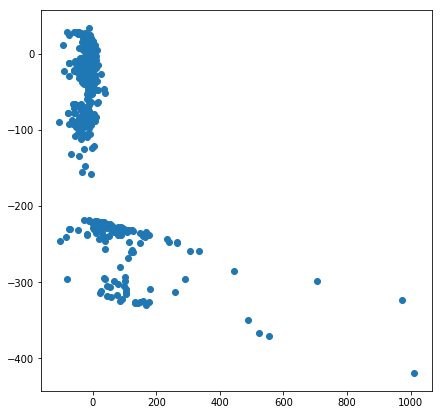

In [543]:
#Rotated data
dR = features @ m.components_
print(dR[:5,:])
plt.figure(figsize=(7,7))
plt.scatter(dR[:,0], dR[:,1])
print("variance by variable:\n", pd.DataFrame(dR).apply(np.var, axis=0))
print("mean by variable:\n", pd.DataFrame(dR).apply(np.mean, axis=0))

[[-6.92920442e+02 -2.84707172e+01  1.23398707e+01 -1.08800236e+02
  -2.54439917e+01 -1.84560400e+01 -3.86413262e+01  2.89586277e+01
   1.76550803e+01 -9.25585012e+00  6.79869225e+00  3.05169647e+00
  -8.49802349e-01 -2.77050153e+00 -5.46917011e+00  1.25115495e+00
   1.09844681e+00  6.77686250e-01  5.05736044e-01  5.16411590e-01
  -1.21538148e+00  1.92289412e-01 -3.27380893e-01  1.90966206e-01
  -1.90559270e-01 -1.36381944e-01  9.93586568e-02 -3.22245663e-02
   4.73232441e-02 -1.36238972e-02  6.08377125e-13  3.30047951e-13
  -1.40597097e-13]
 [-3.11487903e+02 -1.32282849e+02  8.28547297e+01 -9.15447061e+01
  -2.71690606e-01 -2.71889950e+01 -6.75965429e+01 -4.43769429e+00
   7.34247834e+00 -1.08622706e+01 -8.00588498e+00  2.64078844e+00
  -4.88794938e+00 -1.04958554e+00 -1.63899386e-01  9.65419515e-02
   1.49551590e-01  1.18675978e-01 -1.54690731e+00  5.38011389e-01
  -1.79747380e+00  1.84534104e-01 -2.79225108e-01 -1.49789641e-01
  -3.70526449e-01  2.29198979e-01 -1.91416412e-02 -4.1813

Variance by variable:
 [6.76619651e+05 6.69827590e+04 1.52930592e+04 1.15712888e+04
 9.29364184e+03 6.08312430e+03 5.62831212e+03 9.73161269e+02
 4.34492681e+02 2.25305485e+02 1.11161337e+02 9.83118094e+01
 8.96219396e+01 1.44392500e+01 1.29363509e+01 3.22038741e+00
 2.35216953e+00 2.01812500e+00 1.98107243e+00 1.13440046e+00
 1.04488234e+00 3.02038723e-01 1.26867903e-01 1.23275689e-01
 1.12417962e-01 1.01171077e-01 4.95139332e-02 8.80351292e-03
 3.57866695e-03 9.41406564e-05 2.17791270e-27 1.99738341e-27
 3.13546476e-27]
Mean by variable:
 [ 5.75174515e-14  7.18968144e-15  0.00000000e+00 -5.39226108e-15
  1.12338772e-14  5.66187413e-14 -2.42651748e-14  5.84161617e-15
 -4.94290599e-15  7.86371407e-16  3.14548563e-15 -9.82964259e-16
 -8.98710180e-16  1.41125583e-15  3.79143357e-16 -1.96592852e-16
  1.01104895e-15 -2.84357518e-16 -8.07434927e-17 -2.93485043e-15
 -8.54389023e-16 -2.01507673e-15 -7.02117328e-16 -3.04543391e-16
 -6.28395008e-16 -1.13567478e-15 -1.30769352e-16 -2.91817514e-1

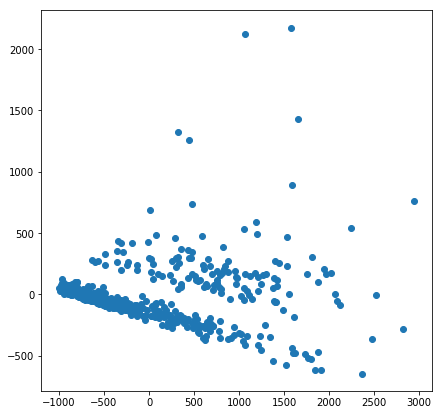

In [544]:
dataRot = PCA().fit_transform(features)
print(dataRot[:5,:])
plt.figure(figsize=(7,7))
plt.scatter(dataRot[:,0], dataRot[:,1])
print("Variance by variable:\n", np.apply_along_axis(np.var, 0, dataRot))
print("Mean by variable:\n", np.apply_along_axis(np.mean, 0, dataRot))

In [581]:
n = len(dataRot)
n
lin = LinearRegression()

506

Text(0.5,1,'Intercept excluded from plot')

Text(0.5,0,'Number of principal components in regression')

Text(0,0.5,'MSE')

(-0.2, 5.2)

Text(0.5,0,'Number of principal components in regression')

Text(0,0.5,'MSE')

(-0.2, 5.2)

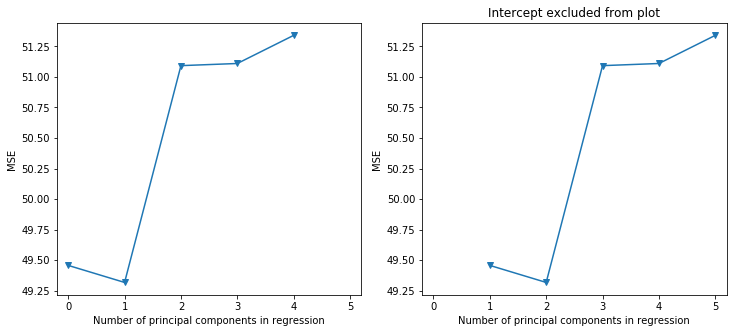

In [589]:
mse = []
for i in np.arange(1,6):
    score = -1*cross_val_score(lin, dataRot[:,:i], b.target.ravel(), cv=10, scoring='mean_squared_error').mean()
    mse.append(score)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(mse, '-v')
ax2.plot([1,2,3,4,5], mse[0:5], '-v')
ax2.set_title('Intercept excluded from plot')

for ax in fig.axes:
    ax.set_xlabel('Number of principal components in regression')
    ax.set_ylabel('MSE')
    ax.set_xlim((-0.2,5.2))

In [608]:
mse

[49.45716924416485,
 49.317749142223654,
 51.09181530930416,
 51.10938784990044,
 51.33965247927263]

### 4.2 Use normal features

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
nfeatures=normalize(features)

In [551]:
m2 = PCA().fit(nfeatures)
print("components:", m2.components_)
print("explained_variance:", m2.explained_variance_)
print("explained_variance_ratio:", m2.explained_variance_ratio_)
print("singular_values:", m2.singular_values_)

components: [[-3.25760458e-03  6.83461868e-02  1.00166162e-03 ... -1.57068891e-06
  -5.35596020e-04 -2.77968301e-04]
 [ 1.74001827e-02 -1.65234912e-02  9.28266278e-03 ...  8.95635918e-07
  -5.62525164e-04  3.64847947e-04]
 [ 4.37490333e-03  2.48195655e-02 -1.08139446e-03 ...  8.33049466e-06
  -1.43308146e-03 -5.18195708e-04]
 ...
 [ 0.00000000e+00  2.31040669e-15  1.35756614e-14 ... -2.41882117e-16
  -1.45118292e-14  3.19557748e-15]
 [ 0.00000000e+00  1.02396371e-16 -5.01070335e-16 ... -1.07323987e-14
  -1.55908272e-16 -2.24592480e-16]
 [ 0.00000000e+00  1.81083951e-17 -5.83387245e-16 ... -8.34616630e-15
   3.78603399e-16  2.02854226e-16]]
explained_variance: [1.29356391e-01 2.13351114e-02 1.59755542e-02 1.29805776e-02
 1.19425050e-02 5.28417439e-03 2.86340380e-03 9.74577637e-04
 6.96822457e-04 4.87278089e-04 2.24786509e-04 1.30983504e-04
 1.19342717e-04 2.71988606e-05 1.43390120e-05 5.65239861e-06
 3.00456838e-06 2.59270057e-06 1.60124060e-06 1.01096604e-06
 7.34188344e-07 3.73267117e

In [591]:
#Cumulative variance
np.cumsum(np.round(m2.explained_variance_ratio_, decimals=4)*100)

array([63.9 , 74.44, 82.33, 88.74, 94.64, 97.25, 98.66, 99.14, 99.48,
       99.72, 99.83, 99.89, 99.95, 99.96, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97, 99.97, 99.97, 99.97, 99.97])

Most of the variance is explained by the first 7 principal components

[[-5.55670553e-02 -3.03096767e-01  6.48592777e-02  1.15014608e-01
   1.39091123e-02  1.20967490e-01 -3.60501737e-01 -4.09286157e-01
  -6.95202159e-03  2.29326993e-02  1.15108250e-02 -3.44176784e-02
   1.94853029e-01 -1.02395479e-01  2.56776540e-02 -4.22734598e-03
   1.27383744e-01  1.74508879e-01 -7.66776291e-02  2.56868812e-03
  -4.95611531e-02  1.05482809e-01 -4.52783653e-02  1.91928860e-02
  -6.21663188e-01  4.13288948e-04 -1.63062896e-02 -2.53167807e-01
   5.85544398e-02  3.40587411e-02 -4.03217882e-04 -1.67161731e-02
  -4.94515423e-03]
 [-1.14453931e-01 -1.84220552e-01 -1.99537913e-02  1.80264081e-01
   2.98679026e-02  1.84669024e-01 -2.23151234e-01 -6.00883646e-01
  -4.59616034e-03  2.22469562e-03  1.55540625e-02 -3.01394802e-02
   1.80679426e-01  3.70219912e-02  6.64110135e-03 -2.29505044e-02
   2.07836240e-01  8.63528532e-02 -5.71620563e-02  6.55158112e-04
   3.90306520e-04  1.56004015e-01 -3.59851223e-02  3.11835551e-02
  -4.40107531e-01  5.70368356e-03 -2.95574372e-03 -3.9725

variance by variable:
 0     1.137774e-03
1     6.361738e-03
2     1.686068e-02
3     3.472878e-03
4     1.901127e-04
5     1.076274e-02
6     8.535602e-03
7     3.313794e-02
8     6.833446e-06
9     3.608238e-04
10    1.334955e-02
11    2.255947e-04
12    2.701906e-03
13    1.570917e-02
14    3.338354e-04
15    1.077665e-03
16    4.891335e-03
17    4.100494e-03
18    2.866738e-04
19    2.440532e-05
20    1.194305e-03
21    9.555351e-03
22    2.003551e-04
23    2.830367e-03
24    4.714503e-02
25    6.411557e-05
26    9.423091e-05
27    1.658615e-02
28    3.729237e-04
29    2.192665e-04
30    8.577923e-08
31    7.666782e-05
32    1.619921e-04
dtype: float64
mean by variable:
 0    -0.096575
1    -0.221570
2     0.051054
3     0.148761
4     0.029446
5     0.106037
6    -0.277044
7    -0.482504
8    -0.005281
9     0.019405
10    0.085168
11   -0.019835
12    0.161144
13    0.098505
14    0.028025
15    0.003382
16    0.178214
17    0.147593
18   -0.052862
19    0.002062
20   -0.029458
2

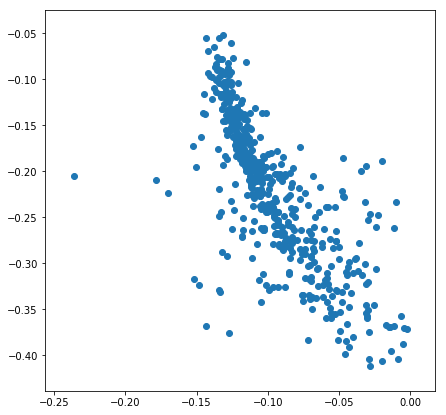

In [552]:
#Rotated data
R2 = nfeatures @ m2.components_
print(R2[:5,:])
plt.figure(figsize=(7,7))
plt.scatter(R2[:,0], R2[:,1])
print("variance by variable:\n", pd.DataFrame(R2).apply(np.var, axis=0))
print("mean by variable:\n", pd.DataFrame(R2).apply(np.mean, axis=0))

[[ 2.98952624e-01 -1.17836804e-01  1.39375227e-01 -9.14842831e-02
  -9.40800304e-02  8.33069028e-03 -2.17377950e-02  2.79127352e-02
  -5.64151229e-02 -2.39782011e-02 -4.78785926e-04  7.97759362e-03
  -2.91499284e-03 -1.23917806e-03 -6.95845354e-03 -1.69946955e-03
  -9.81102167e-04  1.60796160e-03  2.07685844e-03  1.56172631e-04
   7.36329306e-04  4.61342969e-04 -5.38554370e-04  4.11965667e-04
   2.88940289e-04 -5.60211633e-05  2.18670553e-04 -1.09616086e-04
   1.54285908e-04 -2.18782242e-05 -8.40727191e-17  5.25516974e-17
   2.25274165e-16]
 [-1.05342949e-01 -1.87761917e-01  6.06709567e-02 -6.48000758e-02
  -2.94377764e-02  4.43001451e-02 -2.41672486e-02  1.07102869e-02
  -6.83522009e-03 -1.27615444e-02 -1.14025750e-02  2.43703154e-03
   2.56830917e-03 -7.44742296e-04  2.63913843e-04 -2.69285558e-04
  -1.64143213e-03 -1.29929824e-03  1.89219507e-03 -3.50229441e-04
  -1.09290836e-05  4.41507831e-05 -6.59012602e-04 -2.74273937e-04
  -9.92206425e-05 -9.31972947e-05  5.69292976e-05 -8.6803

Variance by variable:
 [1.29100746e-01 2.12929472e-02 1.59439819e-02 1.29549243e-02
 1.19189032e-02 5.27373136e-03 2.85774490e-03 9.72651595e-04
 6.95445337e-04 4.86315089e-04 2.24342267e-04 1.30724643e-04
 1.19106861e-04 2.71451079e-05 1.43106740e-05 5.64122786e-06
 2.99863050e-06 2.58757666e-06 1.59807609e-06 1.00896809e-06
 7.32737379e-07 3.72529435e-07 1.87256936e-07 1.61769357e-07
 1.42197565e-07 9.98744171e-08 2.94365047e-08 1.11058976e-08
 3.57384383e-09 1.32145221e-10 5.89149333e-34 5.88322821e-34
 5.77401856e-34]
Mean by variable:
 [ 2.45741065e-17 -2.80846931e-17 -1.22870532e-17 -2.36964598e-17
 -8.77646660e-19  1.93082265e-17 -3.33505731e-17 -1.64558749e-18
  3.07176331e-18  2.30382248e-18  5.48529162e-18 -3.56543956e-19
  1.70044040e-18 -8.22793744e-20 -4.25110101e-19 -5.97896787e-18
  2.54551814e-19  3.42830726e-20  1.88556900e-19 -4.50822405e-19
 -3.01691039e-19 -1.19647924e-18  1.50845520e-19 -2.21125819e-19
  3.10261807e-19  1.37132291e-18  3.83113337e-19  5.52814546e-2

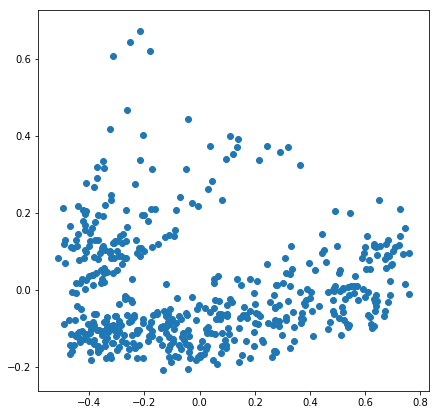

In [553]:
dataRot2 = PCA().fit_transform(nfeatures)
print(dataRot2[:5,:])
plt.figure(figsize=(7,7))
plt.scatter(dataRot2[:,0], dataRot2[:,1])
print("Variance by variable:\n", np.apply_along_axis(np.var, 0, dataRot2))
print("Mean by variable:\n", np.apply_along_axis(np.mean, 0, dataRot2))

In [584]:
n2 = len(dataRot2)
n2
lin = LinearRegression()

506

Text(0.5,1,'Intercept excluded from plot')

Text(0.5,0,'Number of principal components in regression')

Text(0,0.5,'MSE')

(-0.2, 5.2)

Text(0.5,0,'Number of principal components in regression')

Text(0,0.5,'MSE')

(-0.2, 5.2)

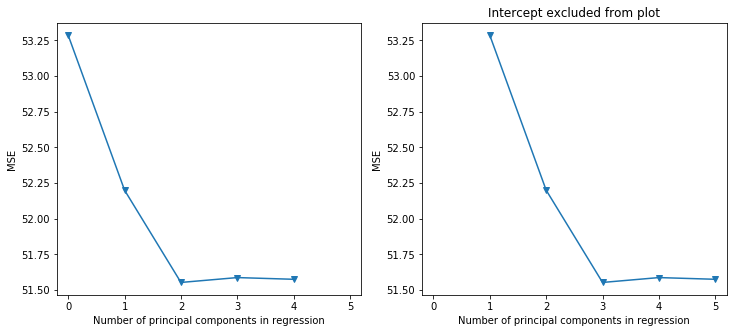

In [606]:
mse2 = []
for i in np.arange(1,6):
    score2 = -1*cross_val_score(lin, dataRot2[:,:i], b.target.ravel(), cv=10, scoring='mean_squared_error').mean()
    mse2.append(score2)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(mse2, '-v')
ax2.plot([1,2,3,4,5], mse2[0:5], '-v')
ax2.set_title('Intercept excluded from plot')

for ax in fig.axes:
    ax.set_xlabel('Number of principal components in regression')
    ax.set_ylabel('MSE')
    ax.set_xlim((-0.2,5.2))

In [603]:
mse2

[53.28551077359115,
 52.19959489637974,
 51.553007766062876,
 51.587151497765305,
 51.57513107612489]

### 4.3


The most precise one is PCA with normalized features as the rate of change of MSE is clearly demonstrated with the addition of features to the regression model. For this reason, the most compact is PCA as well.

The easiest one to perform was forward selection as we had to add the best feature one-by-one till the variance is best explained by the model.

The most straightforward to interpret is however, Principal Component Analysis. The reason being, the cumulative variance explained upto each component gives a clear picture of the amount of variance explained the model with the number of prinicpal components.